# Monolithic script

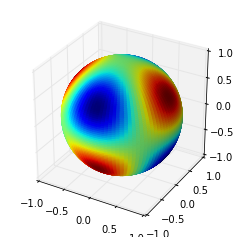

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
%matplotlib inline

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Change order (m) and degree (l)
m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.jet(fcolors))
# Turn off the axis planes
#ax.set_axis_off()
plt.show()

# Function-based approach

In [0]:
def plot_sphharm(m,n,phi,theta):
  """
  Calculate the spherical harmonic Y(n,m), normalize to [0,1]
  and plot it over the warped sphere.
  
  Input parameters
    m    : order
    n    : degree
    phi  : colatitude
    theta: longitude
  """
  
  f = sph_harm(m, n, theta, phi)
  fcos = f.real
  fsin = f.imag
  #print(fsin, fcos)

  if m != 0:
    fmax, fmin = fsin.max(), fsin.min()
    #print(fmax,fmin)
    fcolors = (fsin - fmin)/(fmax - fmin)
  else:
    fmax, fmin = fcos.max(), fcos.min()
    #print(fmax,fmin)
    fcolors = (fcos - fmin)/(fmax - fmin)
  radius = 1.0 #+ 0.1 * fcolors

  # The Cartesian coordinates of the unit sphere
  x = radius * np.sin(phi) * np.cos(theta)
  y = radius * np.sin(phi) * np.sin(theta)
  z = radius * np.cos(phi)

  # Set the aspect ratio to 1 so our sphere looks spherical
  fig = plt.figure(figsize=plt.figaspect(1.))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
  ax.view_init(60, 60)
  # Turn off the axis planes
  #ax.set_axis_off()
  plt.show()

In [0]:
plot_sphharm(4,4,phi,theta)